In [1]:
%load_ext autotime

time: 0 ns (started: 2022-12-22 03:44:36 +07:00)


In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

time: 0 ns (started: 2022-12-22 03:44:36 +07:00)


# DATASET

In [3]:
df = pd.read_csv("generated_dataset.csv")
df.head(5)

,Wellhead Temp. (C),Wellhead Press (psi),MMCFD- gas,BOPD (barrel of oil produced per day),BWPD (barrel of water produced per day),BSW - basic solid and water (%),CO2 mol. (%) @ 25 C & 1 Atm.,Gas Grav.,CR-corrosion defect
0,53.35,1105.13,12.87,1378.93,2812.62,75.64,3.3628,0.7205,0.2245
1,72.25,1026.31,3.42,1028.75,919.92,44.21,3.8679,0.8940,0.2262
2,65.08,722.96,6.23,2017.92,1212.42,17.55,2.3552,0.7661,0.2305
3,60.71,1557.23,11.71,558.22,1716.09,65.79,1.7253,0.7738,0.2303
4,46.19,1304.42,8.58,1280.47,1929.22,37.45,1.8327,0.7611,0.2202


time: 31 ms (started: 2022-12-22 03:44:36 +07:00)


In [4]:
CR_level = []
for row in df['CR-corrosion defect']:
    if row <= 0.211: CR_level.append('Low')
    if row > 0.211: CR_level.append('High')

df['CR-corrosion defect'] = CR_level

time: 0 ns (started: 2022-12-22 03:44:36 +07:00)


# TARGET AND FEATURES SPLIT

In [5]:
target = df['CR-corrosion defect']
features = df.drop('CR-corrosion defect', axis=1)

time: 0 ns (started: 2022-12-22 03:44:36 +07:00)


# VARIABLE CORRELATION MATRIX

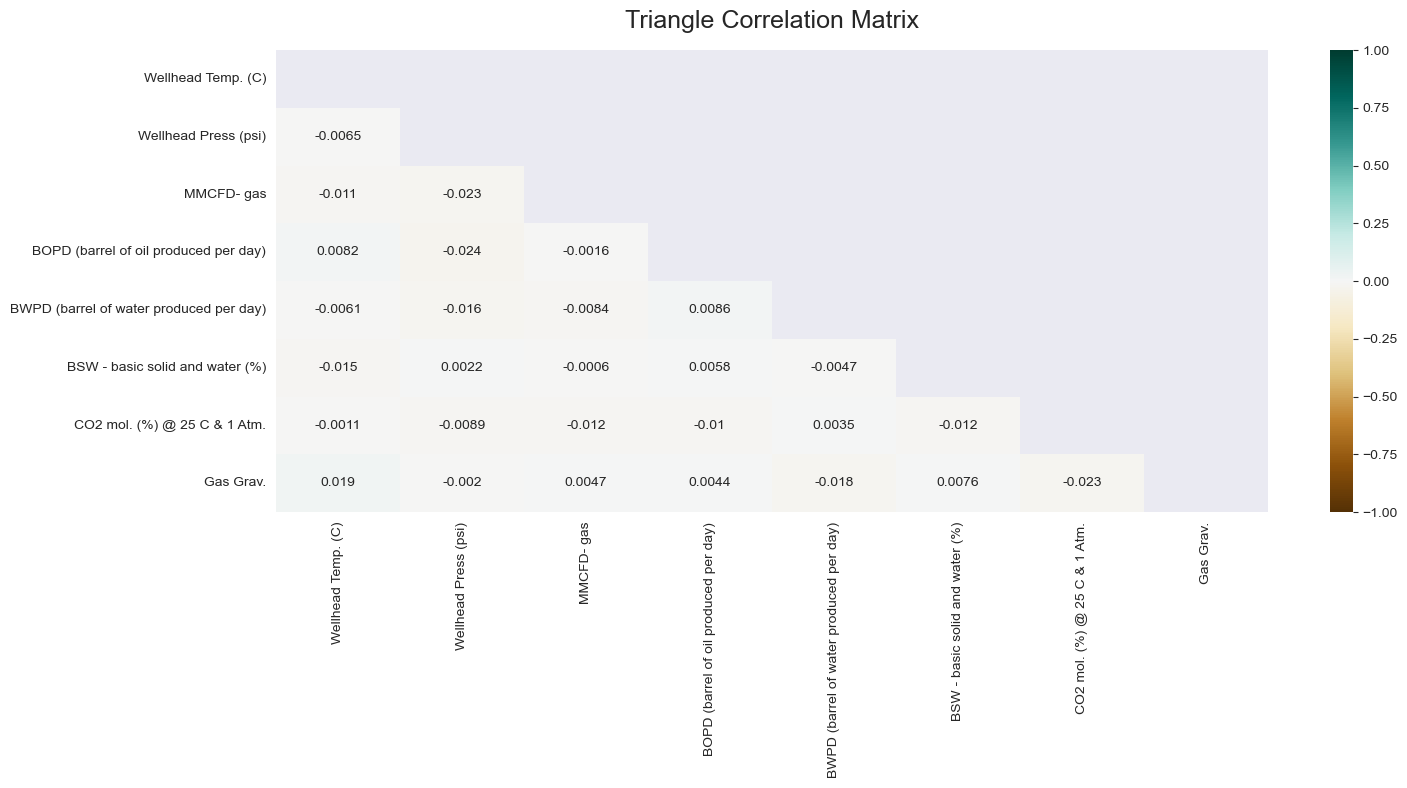

time: 1.19 s (started: 2022-12-22 03:44:36 +07:00)


In [6]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(features.corr(), dtype=np.bool))
corr_matrix = sns.heatmap(features.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

corr_matrix.set_title('Triangle Correlation Matrix', fontdict={'fontsize':18}, pad=16)

plt.savefig('Correlation Matrix.png', dpi=300, bbox_inches='tight')

# TRAIN TEST SPLIT

In [7]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(features, target, test_size=0.25, random_state=42, stratify=target)

time: 234 ms (started: 2022-12-22 03:44:37 +07:00)


# DATA NORMALIZATION

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

Xtrain_scaled = scaler.fit_transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

time: 0 ns (started: 2022-12-22 03:44:37 +07:00)


In [9]:
col_names = ['Wellhead Temp. (C)', 'Wellhead Press (psi)', 'MMCFD- gas', 'BOPD (barrel of oil produced per day', 'BWPD (barrel of water produced per day', 'BSW - basic solid and water (%)', 'CO2 mol. (%) @ 25 C & 1 Atm.', 'Gas Grav.']

time: 0 ns (started: 2022-12-22 03:44:37 +07:00)


In [10]:
Xtrain_scaled = pd.DataFrame(data = Xtrain_scaled, columns = col_names)
Xtest_scaled = pd.DataFrame(data = Xtest_scaled, columns = col_names)

time: 0 ns (started: 2022-12-22 03:44:37 +07:00)


In [11]:
Xtrain_scaled

,Wellhead Temp. (C),Wellhead Press (psi),MMCFD- gas,BOPD (barrel of oil produced per day,BWPD (barrel of water produced per day,BSW - basic solid and water (%),CO2 mol. (%) @ 25 C & 1 Atm.,Gas Grav.
0,0.950915,0.052967,0.783940,0.727889,0.239421,0.134971,0.548182,0.711957
1,0.087805,0.327101,0.764298,0.804252,0.246465,0.001346,0.683888,0.376359
2,0.402439,0.770111,0.512998,0.750716,0.108114,0.891507,0.520693,0.718750
3,0.313720,0.328202,0.228769,0.714967,0.804792,0.076742,0.290032,0.649457
4,0.775305,0.749275,0.518775,0.433478,0.964242,0.210030,0.062051,0.348279
...,...,...,...,...,...,...,...,...
7714,0.053354,0.188394,0.181976,0.988303,0.376989,0.009985,0.525279,0.610960
7715,0.750000,0.399860,0.211438,0.633808,0.882921,0.097722,0.724942,0.221014
7716,0.308841,0.099724,0.619873,0.317734,0.017887,0.094693,0.522793,0.305707
7717,0.628354,0.376369,0.166378,0.310409,0.566533,0.486144,0.166455,0.784420


time: 16 ms (started: 2022-12-22 03:44:37 +07:00)


# OUTLIER DETECTION - ISOLATION FOREST

In [12]:
from sklearn.ensemble import IsolationForest

isol =  IsolationForest(n_estimators=200 ,contamination = 0.05)

isol.fit(Xtrain_scaled)

IsolationForest(contamination=0.05, n_estimators=200)

time: 812 ms (started: 2022-12-22 03:44:37 +07:00)


In [13]:
Xtrain_predict = isol.predict(Xtrain_scaled)

Xtrain_scaled['Predict'] = Xtrain_predict

Xtrain_scaled['Predict'] = Xtrain_scaled['Predict'].astype('category')

time: 359 ms (started: 2022-12-22 03:44:38 +07:00)


In [14]:
ytrain = pd.DataFrame(data = ytrain, columns = ['CR-corrosion defect'])
ytrain['Predict'] = Xtrain_predict

time: 0 ns (started: 2022-12-22 03:44:39 +07:00)


In [15]:
Xtrain_scaled = Xtrain_scaled[Xtrain_scaled.Predict != -1]
ytrain = ytrain[ytrain.Predict != -1]

Xtrain_scaled = Xtrain_scaled.drop('Predict', axis=1)
ytrain =ytrain.drop('Predict', axis=1)

time: 15 ms (started: 2022-12-22 03:44:39 +07:00)


In [16]:
ytrain = np.ravel(ytrain)

time: 0 ns (started: 2022-12-22 03:44:39 +07:00)


# OUTLIER DETECTION - ONE CLASS SVM

In [17]:
from sklearn.svm import OneClassSVM

ee = OneClassSVM(nu=0.01)
yhat = ee.fit_predict(Xtrain_scaled)

time: 156 ms (started: 2022-12-22 03:44:39 +07:00)


In [18]:
Xtrain_scaled['yhat'] = yhat

time: 0 ns (started: 2022-12-22 03:44:39 +07:00)


In [19]:
ytrain = pd.DataFrame(data = ytrain, columns = ['CR-corrosion defect'])
ytrain['yhat'] = yhat

time: 0 ns (started: 2022-12-22 03:44:39 +07:00)


In [20]:
Xtrain_scaled = Xtrain_scaled[Xtrain_scaled.yhat != -1]
ytrain = ytrain[ytrain.yhat != -1]

Xtrain_scaled = Xtrain_scaled.drop('yhat', axis=1)
ytrain =ytrain.drop('yhat', axis=1)

time: 0 ns (started: 2022-12-22 03:44:39 +07:00)


In [21]:
ytrain = np.ravel(ytrain)

time: 0 ns (started: 2022-12-22 03:44:39 +07:00)


In [22]:
Xtrain_scaled

,Wellhead Temp. (C),Wellhead Press (psi),MMCFD- gas,BOPD (barrel of oil produced per day,BWPD (barrel of water produced per day,BSW - basic solid and water (%),CO2 mol. (%) @ 25 C & 1 Atm.,Gas Grav.
0,0.950915,0.052967,0.783940,0.727889,0.239421,0.134971,0.548182,0.711957
1,0.087805,0.327101,0.764298,0.804252,0.246465,0.001346,0.683888,0.376359
2,0.402439,0.770111,0.512998,0.750716,0.108114,0.891507,0.520693,0.718750
3,0.313720,0.328202,0.228769,0.714967,0.804792,0.076742,0.290032,0.649457
4,0.775305,0.749275,0.518775,0.433478,0.964242,0.210030,0.062051,0.348279
...,...,...,...,...,...,...,...,...
7714,0.053354,0.188394,0.181976,0.988303,0.376989,0.009985,0.525279,0.610960
7715,0.750000,0.399860,0.211438,0.633808,0.882921,0.097722,0.724942,0.221014
7716,0.308841,0.099724,0.619873,0.317734,0.017887,0.094693,0.522793,0.305707
7717,0.628354,0.376369,0.166378,0.310409,0.566533,0.486144,0.166455,0.784420


time: 15 ms (started: 2022-12-22 03:44:39 +07:00)


# PCA

In [23]:
from sklearn.decomposition import PCA

pca = PCA(.95)

time: 0 ns (started: 2022-12-22 03:44:39 +07:00)


In [24]:
pca.fit(Xtrain_scaled)

PCA(n_components=0.95)

time: 31 ms (started: 2022-12-22 03:44:39 +07:00)


In [25]:
Xtrain_scaled = pca.transform(Xtrain_scaled)
Xtest_scaled = pca.transform(Xtest_scaled)

time: 15 ms (started: 2022-12-22 03:44:39 +07:00)


In [26]:
Xtrain_scaled

array([[ 0.05862508, -0.65671957, -0.10405575, ..., -0.33697813,
        -0.0338542 ,  0.00909514],
       [ 0.29339704,  0.02565673,  0.03406865, ...,  0.15611115,
        -0.20291134,  0.19282222],
       [-0.51511585, -0.01284784,  0.16406607, ...,  0.02261323,
        -0.22225246,  0.05228117],
       ...,
       [ 0.12850672,  0.11148971, -0.033496  , ..., -0.1635406 ,
         0.29664853, -0.01826055],
       [-0.16745202, -0.21573756,  0.0115424 , ...,  0.10678967,
         0.45870909,  0.07115308],
       [ 0.02665684, -0.08781368,  0.0799313 , ...,  0.3302039 ,
         0.49636106, -0.46414825]])

time: 0 ns (started: 2022-12-22 03:44:39 +07:00)


### NO ANOVA

In [27]:
Xtrain_anova = Xtrain_scaled
Xtest_anova = Xtest_scaled

time: 0 ns (started: 2022-12-22 03:44:39 +07:00)


# ANOVA FEATURE SELECTION

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

fvalue_Best = SelectKBest(f_classif, k=2)
Xtrain_anova = fvalue_Best.fit_transform(Xtrain_scaled, ytrain)

Xtest_anova = fvalue_Best.transform(Xtest_scaled)

# RANDOM FOREST

In [28]:
from sklearn.ensemble import RandomForestClassifier

cforest = RandomForestClassifier(criterion='gini',n_estimators=500, random_state=42, n_jobs=4)

cforest.fit(Xtrain_anova, ytrain)

RandomForestClassifier(n_estimators=500, n_jobs=4, random_state=42)

time: 1.55 s (started: 2022-12-22 03:44:39 +07:00)


## K-FOLD CROSS VALIDATOR - RF

In [29]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=3, shuffle = True, random_state=125)

time: 0 ns (started: 2022-12-22 03:44:40 +07:00)


In [30]:
from sklearn.model_selection import RandomizedSearchCV

max_features = [1,2,3,4, 'auto']
max_depth = [4,8,15,30,None]
min_samples_leaf=[0,1,2,3,5]
n_estimators=[50,100,200,300,400]

param_grid_rf = dict(max_features = max_features, max_depth = max_depth, min_samples_leaf=min_samples_leaf,n_estimators=n_estimators)
grid_rf = RandomizedSearchCV(cforest, param_grid_rf, cv = cv, n_iter=200,n_jobs=-1)

time: 0 ns (started: 2022-12-22 03:44:40 +07:00)


In [31]:
grid_rf.fit(Xtrain_anova, ytrain)

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=125, shuffle=True),
                   estimator=RandomForestClassifier(n_estimators=500, n_jobs=4,
                                                    random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'max_depth': [4, 8, 15, 30, None],
                                        'max_features': [1, 2, 3, 4, 'auto'],
                                        'min_samples_leaf': [0, 1, 2, 3, 5],
                                        'n_estimators': [50, 100, 200, 300,
                                                         400]})

time: 1min 45s (started: 2022-12-22 03:44:40 +07:00)


In [99]:
n_estimators = grid_rf.best_params_['n_estimators']
min_samples_leaf = grid_rf.best_params_['min_samples_leaf']
max_features = grid_rf.best_params_['max_features']
max_depth = grid_rf.best_params_['max_depth']

time: 0 ns (started: 2022-12-22 04:00:52 +07:00)


In [33]:
cf_opt = RandomForestClassifier(criterion='gini',n_estimators=n_estimators, min_samples_leaf=min_samples_leaf,max_features=max_features,max_depth=max_depth,random_state=42, n_jobs=4)
cf_opt.fit(Xtrain_anova, ytrain)

RandomForestClassifier(max_features=3, n_estimators=300, n_jobs=4,
                       random_state=42)

time: 1.5 s (started: 2022-12-22 03:46:26 +07:00)


## SCORE - RF

In [34]:
from sklearn.metrics import classification_report

prediction_rf = cf_opt.predict(Xtest_anova)

print(classification_report(ytest, prediction_rf))

              precision    recall  f1-score   support

        High       0.87      0.93      0.90      1373
         Low       0.91      0.85      0.88      1200

    accuracy                           0.89      2573
   macro avg       0.89      0.89      0.89      2573
weighted avg       0.89      0.89      0.89      2573

time: 188 ms (started: 2022-12-22 03:46:28 +07:00)


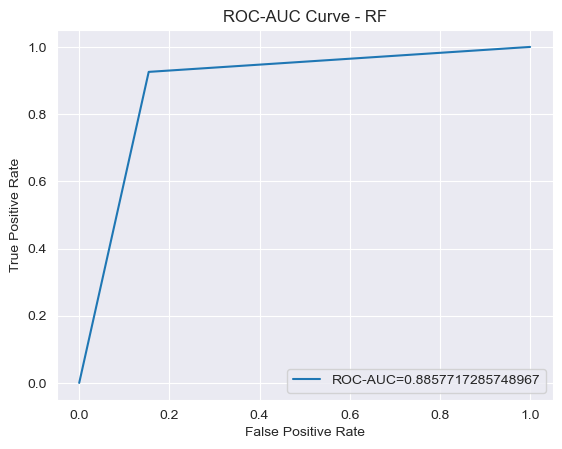

time: 375 ms (started: 2022-12-22 03:46:28 +07:00)


In [35]:
from sklearn import metrics

ytest1 = pd.DataFrame(ytest)
prediction_rf1 = pd.DataFrame(prediction_rf)

fpr, tpr, _ = metrics.roc_curve(ytest1.replace(['High', 'Low'], [1, 0]), prediction_rf1.replace(['High', 'Low'], [1, 0]))
rocauc_rf = metrics.roc_auc_score(ytest1.replace(['High', 'Low'], [1, 0]), prediction_rf1.replace(['High', 'Low'], [1, 0]))

plt.plot(fpr,tpr,label="ROC-AUC="+str(rocauc_rf))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC-AUC Curve - RF')
plt.savefig('ROC-AUC Curve - RF')
plt.show()

In [36]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score

precision_rf,recall_rf,fscore_rf,support_rf=score(ytest, prediction_rf,average='macro')
accuracy_rf = accuracy_score(ytest, prediction_rf)

print('Precision : {}'.format(precision_rf))
print('Recall    : {}'.format(recall_rf))
print('F-score   : {}'.format(fscore_rf))
print('Accuracy  : {}'.format(accuracy_rf))
print('ROC-AUC   : {}'.format(rocauc_rf))

Precision : 0.8908117676862082
Recall    : 0.8857717285748968
F-score   : 0.8873418275756382
Accuracy  : 0.8884570540225418
ROC-AUC   : 0.8857717285748967
time: 15 ms (started: 2022-12-22 03:46:29 +07:00)


## CONFUSION MATRIX - RF

In [37]:
actual_rf = np.random.binomial(1,.9,size = 1000)
predicted_rf = np.random.binomial(1,.9,size = 1000)

confusion_matrix_rf = metrics.confusion_matrix(ytest, prediction_rf)

cm_display_rf = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_rf, display_labels = [False, True])

time: 15 ms (started: 2022-12-22 03:46:29 +07:00)


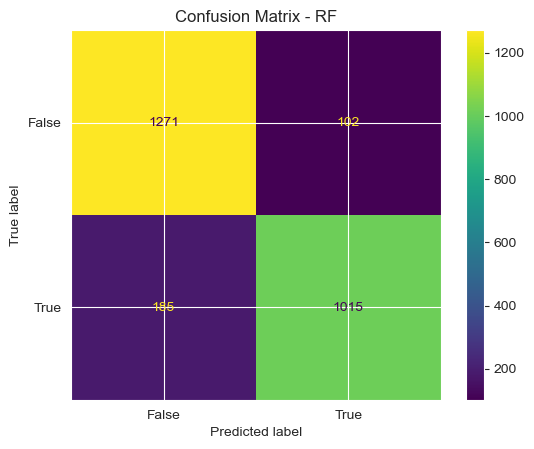

time: 297 ms (started: 2022-12-22 03:46:29 +07:00)


In [38]:
cm_display_rf.plot()
plt.title('Confusion Matrix - RF')
plt.savefig('Confusion Matrix - RF.png')
plt.show()

## FEATURE IMPORTANCE - RF

 1) MMCFD- gas                     0.178012
 2) BSW - basic solid and water (%) 0.176230
 3) CO2 mol. (%) @ 25 C & 1 Atm.   0.146467
 4) Wellhead Temp. (C)             0.120687
 5) BWPD (barrel of water produced per day) 0.102588
 6) Gas Grav.                      0.095513
 7) Wellhead Press (psi)           0.092068
 8) BOPD (barrel of oil produced per day) 0.088435


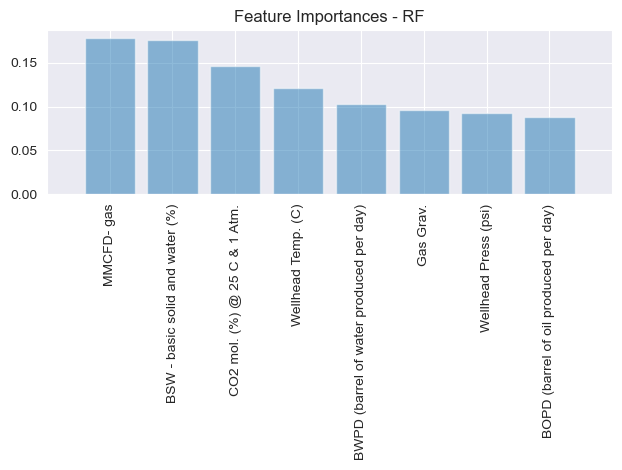

time: 406 ms (started: 2022-12-22 03:46:29 +07:00)


In [39]:
importances_rf = cf_opt.feature_importances_

indices_rf = np.argsort(importances_rf)[::-1]

for f in range(Xtrain_anova.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, features.columns.values[indices_rf[f]], importances_rf[indices_rf[f]]))

plt.figure()
plt.title('Feature Importances - RF')
plt.bar(range(Xtrain_anova.shape[1]),importances_rf[indices_rf],align='center',alpha=0.5)

plt.xticks(range(Xtrain_anova.shape[1]), features.columns.values[indices_rf], rotation=90)
plt.xlim([-1, Xtrain_anova.shape[1]])
plt.tight_layout()
plt.savefig('Feature Importances - RF.png')
plt.show()

# DECISION TREE

In [40]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(criterion='gini',max_depth=4,min_samples_split=2,min_samples_leaf=1,max_features=0.25)
dtree.fit(Xtrain_anova, ytrain)

DecisionTreeClassifier(max_depth=4, max_features=0.25)

time: 16 ms (started: 2022-12-22 03:46:29 +07:00)


## K-CROSS VALIDATOR - DT

In [41]:
max_depth = [4,8,15,30,None]
min_samples_split=[0,1,2,3,5]
min_samples_leaf=[0,1,2,3,5]
max_features = [0.1,0.25,0.5,0.75,1.0]

param_grid_dt = dict(max_features = max_features, max_depth = max_depth, min_samples_leaf=min_samples_leaf,min_samples_split=min_samples_split)
grid_dt = RandomizedSearchCV(dtree, param_grid_dt, cv = cv, n_iter=200,n_jobs=-1)

time: 0 ns (started: 2022-12-22 03:46:29 +07:00)


In [42]:
grid_dt.fit(Xtrain_anova, ytrain)

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=125, shuffle=True),
                   estimator=DecisionTreeClassifier(max_depth=4,
                                                    max_features=0.25),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'max_depth': [4, 8, 15, 30, None],
                                        'max_features': [0.1, 0.25, 0.5, 0.75,
                                                         1.0],
                                        'min_samples_leaf': [0, 1, 2, 3, 5],
                                        'min_samples_split': [0, 1, 2, 3, 5]})

time: 1.62 s (started: 2022-12-22 03:46:29 +07:00)


In [102]:
min_samples_leaf = grid_dt.best_params_['min_samples_leaf']
max_features = grid_dt.best_params_['max_features']
max_depth = grid_dt.best_params_['max_depth']
min_samples_split = grid_dt.best_params_['min_samples_split']

time: 0 ns (started: 2022-12-22 04:01:31 +07:00)


In [44]:
dt_opt = RandomForestClassifier(criterion='gini', min_samples_leaf=min_samples_leaf,max_features=max_features,max_depth=max_depth,min_samples_split=min_samples_split)
dt_opt.fit(Xtrain_anova, ytrain)

RandomForestClassifier(max_depth=8, max_features=1.0, min_samples_leaf=2,
                       min_samples_split=5)

time: 2.33 s (started: 2022-12-22 03:46:31 +07:00)


## SCORE - DT

In [45]:
prediction_dt = dt_opt.predict(Xtest_anova)

print(classification_report(ytest, prediction_dt))

              precision    recall  f1-score   support

        High       0.83      0.91      0.87      1373
         Low       0.88      0.79      0.83      1200

    accuracy                           0.85      2573
   macro avg       0.86      0.85      0.85      2573
weighted avg       0.85      0.85      0.85      2573

time: 94 ms (started: 2022-12-22 03:46:33 +07:00)


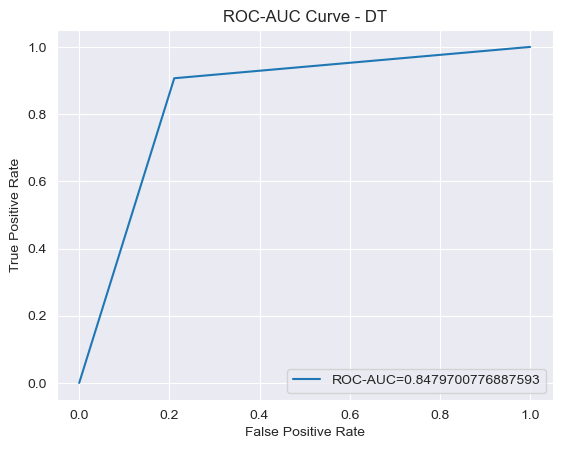

time: 234 ms (started: 2022-12-22 03:46:33 +07:00)


In [46]:
prediction_dt1 = pd.DataFrame(prediction_dt)

fpr, tpr, _ = metrics.roc_curve(ytest1.replace(['High', 'Low'], [1, 0]), prediction_dt1.replace(['High', 'Low'], [1, 0]))
rocauc_dt = metrics.roc_auc_score(ytest1.replace(['High', 'Low'], [1, 0]), prediction_dt1.replace(['High', 'Low'], [1, 0]))

plt.plot(fpr,tpr,label="ROC-AUC="+str(rocauc_dt))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC-AUC Curve - DT')
plt.savefig('ROC-AUC Curve - DT')
plt.show()

In [47]:
precision_dt,recall_dt,fscore_dt,support_dt=score(ytest, prediction_dt,average='macro')
accuracy_dt = accuracy_score(ytest, prediction_dt)

print('Precision : {}'.format(precision_dt))
print('Recall    : {}'.format(recall_dt))
print('F-score   : {}'.format(fscore_dt))
print('Accuracy  : {}'.format(accuracy_dt))
print('ROC-AUC   : {}'.format(rocauc_dt))

Precision : 0.856019188375198
Recall    : 0.8479700776887594
F-score   : 0.849910549220894
Accuracy  : 0.8519238243295764
ROC-AUC   : 0.8479700776887593
time: 31 ms (started: 2022-12-22 03:46:34 +07:00)


## CONFUSION MATRIX - DT

In [48]:
actual_dt = np.random.binomial(1,.9,size = 1000)
predicted_dt = np.random.binomial(1,.9,size = 1000)

confusion_matrix_dt = metrics.confusion_matrix(ytest, prediction_dt)

cm_display_dt = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_dt, display_labels = [False, True])

time: 16 ms (started: 2022-12-22 03:46:34 +07:00)


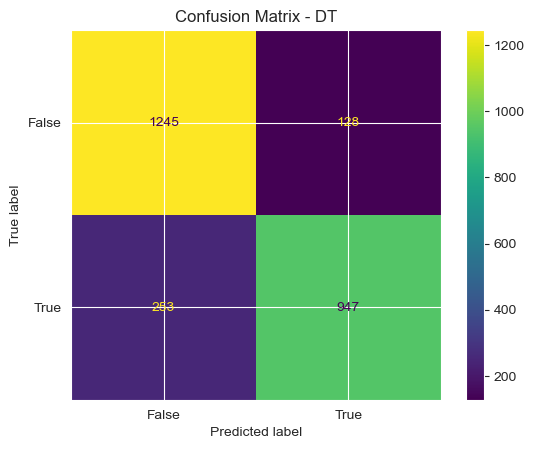

time: 688 ms (started: 2022-12-22 03:46:34 +07:00)


In [49]:
cm_display_dt.plot()
plt.title('Confusion Matrix - DT')
plt.savefig('Confusion Matrix - DT.png')
plt.show()

## FEATURE IMPORTANCE - DT

 1) MMCFD- gas                     0.207206
 2) BSW - basic solid and water (%) 0.199856
 3) CO2 mol. (%) @ 25 C & 1 Atm.   0.162996
 4) Wellhead Temp. (C)             0.123899
 5) BWPD (barrel of water produced per day) 0.093227
 6) Wellhead Press (psi)           0.080649
 7) Gas Grav.                      0.072763
 8) BOPD (barrel of oil produced per day) 0.059404


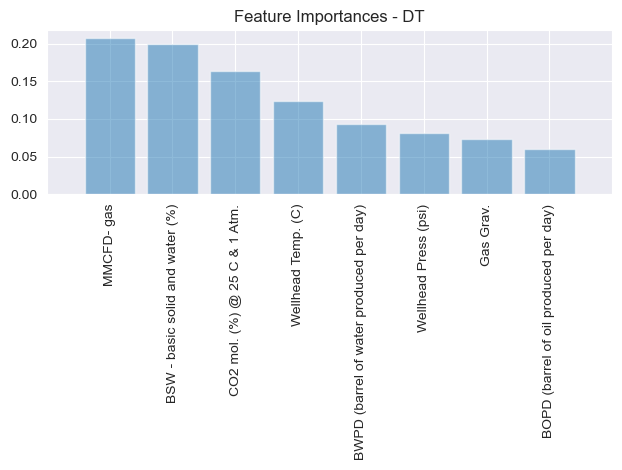

time: 266 ms (started: 2022-12-22 03:46:34 +07:00)


In [50]:
importances_dt = dt_opt.feature_importances_

indices_dt = np.argsort(importances_dt)[::-1]

for f in range(Xtrain_anova.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, features.columns.values[indices_dt[f]], importances_dt[indices_dt[f]]))

plt.figure()
plt.title('Feature Importances - DT')
plt.bar(range(Xtrain_anova.shape[1]), importances_dt[indices_dt], align='center', alpha=0.5)

plt.xticks(range(Xtrain_anova.shape[1]), features.columns.values[indices_dt], rotation=90)
plt.xlim([-1, Xtrain_anova.shape[1]])
plt.tight_layout()
plt.savefig('Feature Importances - DT.png')
plt.show()

# SVM

In [51]:
from sklearn import svm

svmc = svm.SVC()
svmc.fit(Xtrain_anova, ytrain)

SVC()

time: 859 ms (started: 2022-12-22 03:46:35 +07:00)


## K-CROSS VALIDATOR - SVM

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid_svmc = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}
grid_svmc = GridSearchCV(svmc, param_grid_svmc, cv = cv, n_jobs=-1, verbose=3)

time: 0 ns (started: 2022-12-22 03:46:36 +07:00)


In [53]:
grid_svmc.fit(Xtrain_anova, ytrain)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=125, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=3)

time: 13.8 s (started: 2022-12-22 03:46:36 +07:00)


In [54]:
C = grid_svmc.best_params_['C']
gamma = grid_svmc.best_params_['gamma']

time: 0 ns (started: 2022-12-22 03:46:49 +07:00)


In [55]:
svm_opt = svm.SVC(C=C, gamma=gamma, kernel='rbf')
svm_opt.fit(Xtrain_anova,ytrain)

SVC(C=100, gamma=0.1)

time: 891 ms (started: 2022-12-22 03:46:49 +07:00)


## SCORE - SVM

In [56]:
prediction_svm = svm_opt.predict(Xtest_anova)

print(classification_report(ytest, prediction_svm))

              precision    recall  f1-score   support

        High       0.97      0.96      0.97      1373
         Low       0.96      0.96      0.96      1200

    accuracy                           0.96      2573
   macro avg       0.96      0.96      0.96      2573
weighted avg       0.96      0.96      0.96      2573

time: 422 ms (started: 2022-12-22 03:46:50 +07:00)


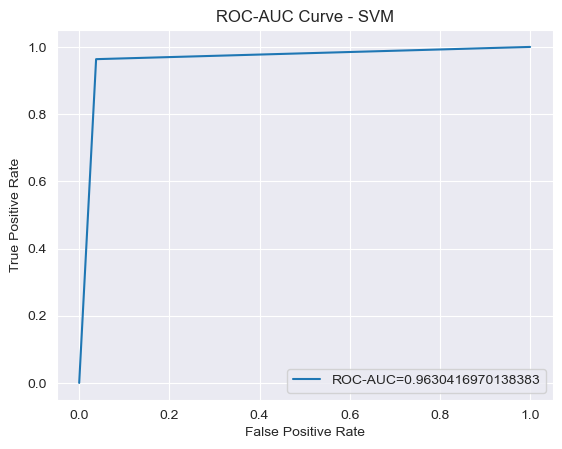

time: 281 ms (started: 2022-12-22 03:46:51 +07:00)


In [57]:
prediction_svm1 = pd.DataFrame(prediction_svm)

fpr, tpr, _ = metrics.roc_curve(ytest1.replace(['High', 'Low'], [1, 0]), prediction_svm1.replace(['High', 'Low'], [1, 0]))
rocauc_svm = metrics.roc_auc_score(ytest1.replace(['High', 'Low'], [1, 0]), prediction_svm1.replace(['High', 'Low'], [1, 0]))

plt.plot(fpr,tpr,label="ROC-AUC="+str(rocauc_svm))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC-AUC Curve - SVM')
plt.savefig('ROC-AUC Curve - SVM')
plt.show()

In [58]:
precision_svm,recall_svm,fscore_svm,support_svm=score(ytest, prediction_svm,average='macro')
accuracy_svm = accuracy_score(ytest, prediction_svm)

print('Precision : {}'.format(precision_svm))
print('Recall    : {}'.format(recall_svm))
print('F-score   : {}'.format(fscore_svm))
print('Accuracy  : {}'.format(accuracy_svm))
print('ROC-AUC   : {}'.format(rocauc_svm))

Precision : 0.9628057436121424
Recall    : 0.9630416970138382
F-score   : 0.9629200384399217
Accuracy  : 0.9630781189273222
ROC-AUC   : 0.9630416970138383
time: 16 ms (started: 2022-12-22 03:46:51 +07:00)


## CONFUSION MATRIX - SVM

In [59]:
actual_svm = np.random.binomial(1,.9,size = 1000)
predicted_svm = np.random.binomial(1,.9,size = 1000)

confusion_matrix_svm = metrics.confusion_matrix(ytest, prediction_svm)

cm_display_svm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_svm, display_labels = [False, True])

time: 0 ns (started: 2022-12-22 03:46:51 +07:00)


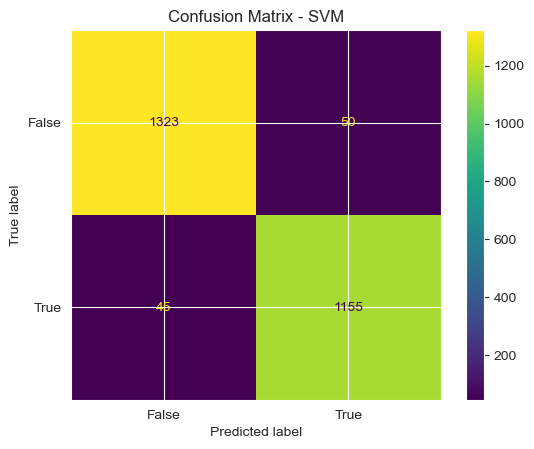

time: 250 ms (started: 2022-12-22 03:46:51 +07:00)


In [60]:
cm_display_svm.plot()
plt.title('Confusion Matrix - SVM')
plt.savefig('Confusion Matrix - SVM.png')
plt.show()

## FEATURE IMPORTANCE - SVM

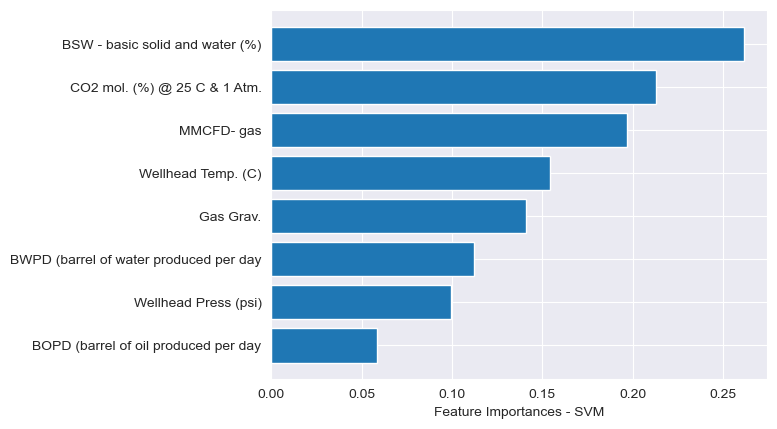

time: 13.7 s (started: 2022-12-22 03:46:51 +07:00)


In [61]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(svm_opt, Xtest_anova, ytest)

feature_names = ['Wellhead Temp. (C)', 'Wellhead Press (psi)', 'MMCFD- gas', 'BOPD (barrel of oil produced per day', 'BWPD (barrel of water produced per day', 'BSW - basic solid and water (%)', 'CO2 mol. (%) @ 25 C & 1 Atm.', 'Gas Grav.']
features_arr = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features_arr[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importances - SVM")
plt.savefig('Feature Importances - SVM.png', bbox_inches='tight')

# XG BOOST

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

xgb = GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=0.1)
xgb.fit(Xtrain_anova,ytrain)

GradientBoostingClassifier(learning_rate=0.05, max_features=0.1,
                           n_estimators=500, random_state=100)

time: 1.69 s (started: 2022-12-22 03:47:05 +07:00)


## K-CROSS VALIDATOR - XG BOOST

In [63]:
from sklearn.model_selection import GridSearchCV

param_grid_xgb = {'n_estimators': np.arange(100,500,100), 'learning_rate': [0.01,0.05,0.1],'max_depth' : [2,3,4,5,6,7], 'max_features' : [0.1,0.5,1]}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv = cv, n_jobs=-1)

time: 0 ns (started: 2022-12-22 03:47:07 +07:00)


In [64]:
grid_xgb.fit(Xtrain_anova, ytrain)

GridSearchCV(cv=KFold(n_splits=3, random_state=125, shuffle=True),
             estimator=GradientBoostingClassifier(learning_rate=0.05,
                                                  max_features=0.1,
                                                  n_estimators=500,
                                                  random_state=100),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [2, 3, 4, 5, 6, 7],
                         'max_features': [0.1, 0.5, 1],
                         'n_estimators': array([100, 200, 300, 400])})

time: 2min (started: 2022-12-22 03:47:07 +07:00)


In [103]:
learning_rate = grid_xgb.best_params_['learning_rate']
max_depth = grid_xgb.best_params_['max_depth']
n_estimators = grid_xgb.best_params_['n_estimators']
max_features = grid_xgb.best_params_['max_features']

time: 0 ns (started: 2022-12-22 04:02:22 +07:00)


In [66]:
xgb_opt = GradientBoostingClassifier(n_estimators=n_estimators,learning_rate=learning_rate,random_state=100,max_features=max_features, max_depth=max_depth)
xgb_opt.fit(Xtrain_anova,ytrain)

GradientBoostingClassifier(max_depth=7, max_features=0.5, n_estimators=400,
                           random_state=100)

time: 7.19 s (started: 2022-12-22 03:49:07 +07:00)


## SCORE - XG BOOST

In [67]:
prediction_xgb = xgb_opt.predict(Xtest_anova)

print(classification_report(ytest, prediction_xgb))

              precision    recall  f1-score   support

        High       0.90      0.93      0.92      1373
         Low       0.92      0.88      0.90      1200

    accuracy                           0.91      2573
   macro avg       0.91      0.91      0.91      2573
weighted avg       0.91      0.91      0.91      2573

time: 93 ms (started: 2022-12-22 03:49:15 +07:00)


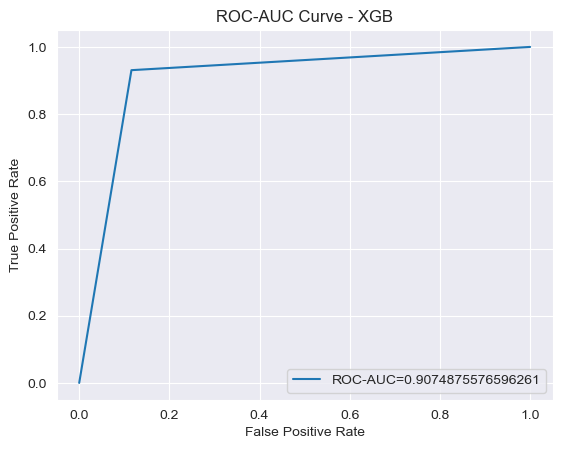

time: 266 ms (started: 2022-12-22 03:49:15 +07:00)


In [68]:
prediction_xgb1 = pd.DataFrame(prediction_xgb)

fpr, tpr, _ = metrics.roc_curve(ytest1.replace(['High', 'Low'], [1, 0]), prediction_xgb1.replace(['High', 'Low'], [1, 0]))
rocauc_xgb = metrics.roc_auc_score(ytest1.replace(['High', 'Low'], [1, 0]), prediction_xgb1.replace(['High', 'Low'], [1, 0]))

plt.plot(fpr,tpr,label="ROC-AUC="+str(rocauc_xgb))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC-AUC Curve - XGB')
plt.savefig('ROC-AUC Curve - XGB')
plt.show()

In [69]:
precision_xgb,recall_xgb,fscore_xgb,support_xgb=score(ytest, prediction_xgb,average='macro')
accuracy_xgb = accuracy_score(ytest, prediction_xgb)

print('Precision : {}'.format(precision_xgb))
print('Recall    : {}'.format(recall_xgb))
print('F-score   : {}'.format(fscore_xgb))
print('Accuracy  : {}'.format(accuracy_xgb))
print('ROC-AUC   : {}'.format(rocauc_xgb))

Precision : 0.909862751609839
Recall    : 0.9074875576596262
F-score   : 0.9084040747028863
Accuracy  : 0.9090555771472989
ROC-AUC   : 0.9074875576596261
time: 16 ms (started: 2022-12-22 03:49:15 +07:00)


## CONFUSION MATRIX - XG BOOST

In [70]:
actual_xgb = np.random.binomial(1,.9,size = 1000)
predicted_xgb = np.random.binomial(1,.9,size = 1000)

confusion_matrix_xgb = metrics.confusion_matrix(ytest, prediction_xgb)

cm_display_xgb = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_xgb, display_labels = [False, True])

time: 15 ms (started: 2022-12-22 03:49:15 +07:00)


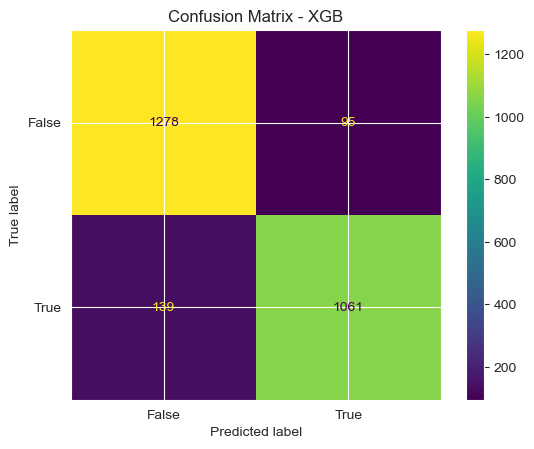

time: 250 ms (started: 2022-12-22 03:49:15 +07:00)


In [71]:
cm_display_xgb.plot()
plt.title('Confusion Matrix - XGB')
plt.savefig('Confusion Matrix - XGB.png')
plt.show()

## FEATURE IMPORTANCE - XGB

 1) BSW - basic solid and water (%) 0.190050
 2) MMCFD- gas                     0.183176
 3) CO2 mol. (%) @ 25 C & 1 Atm.   0.164890
 4) Wellhead Temp. (C)             0.127874
 5) Gas Grav.                      0.092852
 6) BWPD (barrel of water produced per day) 0.087940
 7) Wellhead Press (psi)           0.083049
 8) BOPD (barrel of oil produced per day) 0.070169


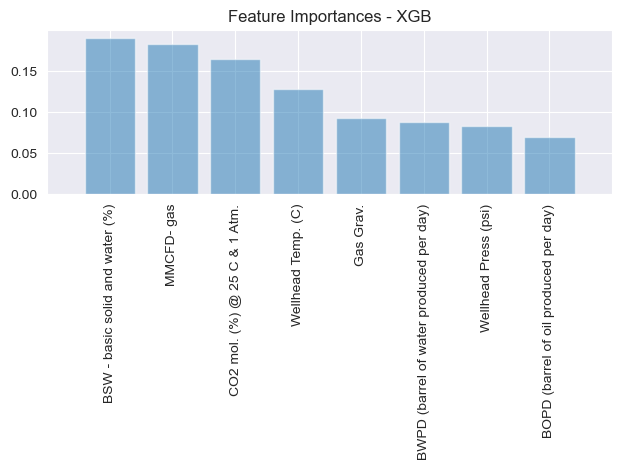

time: 235 ms (started: 2022-12-22 03:49:15 +07:00)


In [72]:
importances_xgb = xgb_opt.feature_importances_

indices_xgb = np.argsort(importances_xgb)[::-1]

for f in range(Xtrain_anova.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, features.columns.values[indices_xgb[f]], importances_xgb[indices_xgb[f]]))

plt.figure()
plt.title('Feature Importances - XGB')
plt.bar(range(Xtrain_anova.shape[1]), importances_xgb[indices_xgb], align='center', alpha=0.5)

plt.xticks(range(Xtrain_anova.shape[1]), features.columns.values[indices_xgb], rotation=90)
plt.xlim([-1, Xtrain_anova.shape[1]])
plt.tight_layout()
plt.savefig('Feature Importances - XGB.png')
plt.show()

# K-NEAREST NEIGHBOR

In [73]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(Xtrain_anova, ytrain)

KNeighborsClassifier()

time: 16 ms (started: 2022-12-22 03:49:16 +07:00)


## K-CROSS VALIDATOR - KNN

In [74]:
param_grid_knn = {'n_neighbors': [5,10,15,20,25], 'p':[1,2], 'leaf_size':[30,40,50]}
grid_knn = GridSearchCV(knn, param_grid_knn, cv = cv, n_jobs=-1)

time: 0 ns (started: 2022-12-22 03:49:16 +07:00)


In [75]:
grid_knn.fit(Xtrain_anova, ytrain)

GridSearchCV(cv=KFold(n_splits=3, random_state=125, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [30, 40, 50],
                         'n_neighbors': [5, 10, 15, 20, 25], 'p': [1, 2]})

time: 2.5 s (started: 2022-12-22 03:49:16 +07:00)


In [105]:
n_neighbors = grid_knn.best_params_['n_neighbors']
p = grid_knn.best_params_['p']
leaf_size = grid_knn.best_params_['leaf_size']

time: 0 ns (started: 2022-12-22 04:02:50 +07:00)


In [77]:
knn_opt = KNeighborsClassifier(n_neighbors = n_neighbors, p = p, leaf_size = leaf_size)
knn_opt.fit(Xtrain_anova,ytrain)

KNeighborsClassifier(n_neighbors=25)

time: 16 ms (started: 2022-12-22 03:49:18 +07:00)


## SCORE - KNN

In [78]:
prediction_knn = knn_opt.predict(Xtest_anova)

print(classification_report(ytest, prediction_knn))

              precision    recall  f1-score   support

        High       0.88      0.92      0.90      1373
         Low       0.90      0.86      0.88      1200

    accuracy                           0.89      2573
   macro avg       0.89      0.89      0.89      2573
weighted avg       0.89      0.89      0.89      2573

time: 250 ms (started: 2022-12-22 03:49:18 +07:00)


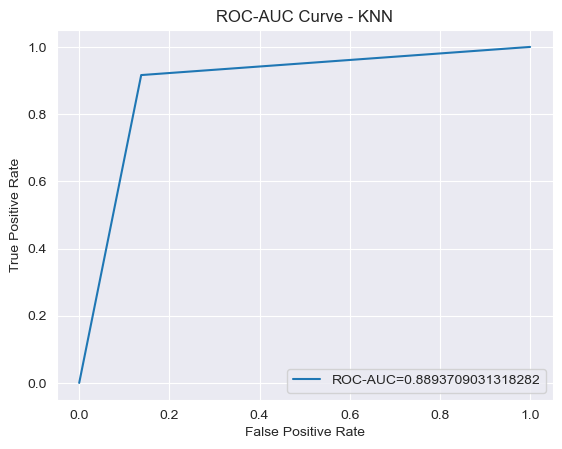

time: 203 ms (started: 2022-12-22 03:49:18 +07:00)


In [79]:
prediction_knn1 = pd.DataFrame(prediction_knn)

fpr, tpr, _ = metrics.roc_curve(ytest1.replace(['High', 'Low'], [1, 0]), prediction_knn1.replace(['High', 'Low'], [1, 0]))
rocauc_knn = metrics.roc_auc_score(ytest1.replace(['High', 'Low'], [1, 0]), prediction_knn1.replace(['High', 'Low'], [1, 0]))

plt.plot(fpr,tpr,label="ROC-AUC="+str(rocauc_knn))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC-AUC Curve - KNN')
plt.savefig('ROC-AUC Curve - KNN')
plt.show()

In [80]:
precision_knn,recall_knn,fscore_knn,support_knn=score(ytest, prediction_knn,average='macro')
accuracy_knn = accuracy_score(ytest, prediction_knn)

print('Precision : {}'.format(precision_knn))
print('Recall    : {}'.format(recall_knn))
print('F-score   : {}'.format(fscore_knn))
print('Accuracy  : {}'.format(accuracy_knn))
print('ROC-AUC   : {}'.format(rocauc_knn))

Precision : 0.8920238931834154
Recall    : 0.8893709031318282
F-score   : 0.8903540011566676
Accuracy  : 0.8911776136805286
ROC-AUC   : 0.8893709031318282
time: 16 ms (started: 2022-12-22 03:49:19 +07:00)


## CONFUSION MATRIX - KNN

In [81]:
actual_knn = np.random.binomial(1, .9, size=1000)
predicted_knn = np.random.binomial(1, .9, size=1000)

confusion_matrix_knn = metrics.confusion_matrix(ytest, prediction_knn)

cm_display_knn = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_knn, display_labels=[False, True])

time: 15 ms (started: 2022-12-22 03:49:19 +07:00)


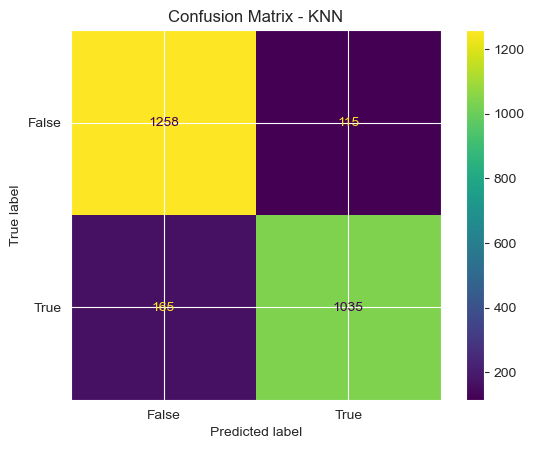

time: 235 ms (started: 2022-12-22 03:49:19 +07:00)


In [82]:
cm_display_knn.plot()
plt.title('Confusion Matrix - KNN')
plt.savefig('Confusion Matrix - KNN.png')
plt.show()

## FEATURE IMPORTANCE - KNN

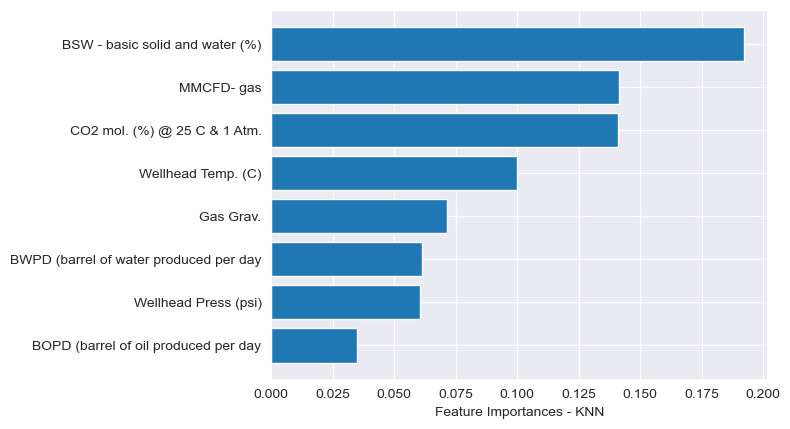

time: 8.11 s (started: 2022-12-22 03:49:19 +07:00)


In [83]:
perm_importance = permutation_importance(knn_opt, Xtest_anova, ytest)

feature_names = ['Wellhead Temp. (C)', 'Wellhead Press (psi)', 'MMCFD- gas', 'BOPD (barrel of oil produced per day', 'BWPD (barrel of water produced per day', 'BSW - basic solid and water (%)', 'CO2 mol. (%) @ 25 C & 1 Atm.', 'Gas Grav.']
features_arr = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features_arr[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importances - KNN")
plt.savefig('Feature Importances - KNN.png', bbox_inches='tight')

# NEURAL NETWORK - MLP CLASSIFIER

In [84]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
mlp.fit(Xtrain_anova, ytrain)

MLPClassifier()

time: 5.06 s (started: 2022-12-22 03:49:27 +07:00)


## K-CROSS VALIDATOR - MLP

In [85]:
param_grid_mlp = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
                  'activation': ['tanh', 'relu'],
                  'solver': ['sgd', 'adam'],
                  'alpha': [0.0001, 0.05],
                  'learning_rate': ['constant','adaptive']}
grid_mlp = RandomizedSearchCV(mlp, param_grid_mlp, cv=cv, n_iter=200, n_jobs=-1)

time: 0 ns (started: 2022-12-22 03:49:32 +07:00)


In [86]:
grid_mlp.fit(Xtrain_anova, ytrain)

RandomizedSearchCV(cv=KFold(n_splits=3, random_state=125, shuffle=True),
                   estimator=MLPClassifier(), n_iter=200, n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'alpha': [0.0001, 0.05],
                                        'hidden_layer_sizes': [(50, 50, 50),
                                                               (50, 100, 50),
                                                               (100,)],
                                        'learning_rate': ['constant',
                                                          'adaptive'],
                                        'solver': ['sgd', 'adam']})

time: 2min 33s (started: 2022-12-22 03:49:32 +07:00)


In [109]:
hidden_layer_sizes = grid_mlp.best_params_['hidden_layer_sizes']
activation = grid_mlp.best_params_['activation']
solver = grid_mlp.best_params_['solver']
alpha = grid_mlp.best_params_['alpha']
learning_rate = grid_mlp.best_params_['learning_rate']

time: 0 ns (started: 2022-12-22 04:03:19 +07:00)


In [88]:
mlp_opt = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, activation=activation, solver=solver, alpha=alpha,
                       learning_rate=learning_rate)
mlp_opt.fit(Xtrain_anova, ytrain)

MLPClassifier(activation='tanh', alpha=0.05, hidden_layer_sizes=(50, 50, 50))

time: 9.95 s (started: 2022-12-22 03:52:05 +07:00)


In [89]:
prediction_mlp = mlp_opt.predict(Xtest_anova)

time: 16 ms (started: 2022-12-22 03:52:15 +07:00)


## SCORE - MLP

In [90]:
print(classification_report(ytest, prediction_mlp))

              precision    recall  f1-score   support

        High       0.97      0.97      0.97      1373
         Low       0.96      0.97      0.96      1200

    accuracy                           0.97      2573
   macro avg       0.97      0.97      0.97      2573
weighted avg       0.97      0.97      0.97      2573

time: 47 ms (started: 2022-12-22 03:52:15 +07:00)


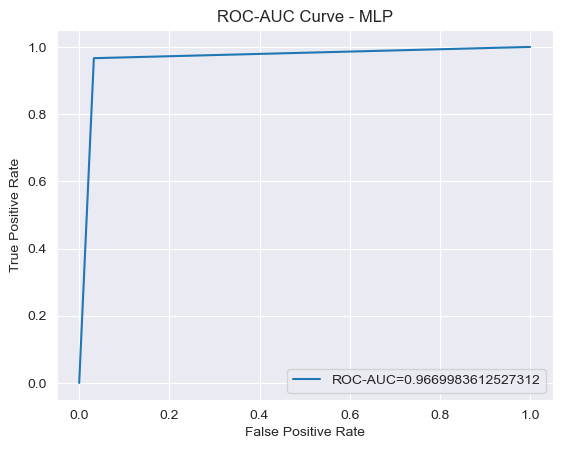

time: 250 ms (started: 2022-12-22 03:52:15 +07:00)


In [91]:
prediction_mlp1 = pd.DataFrame(prediction_mlp)

fpr, tpr, _ = metrics.roc_curve(ytest1.replace(['High', 'Low'], [1, 0]), prediction_mlp1.replace(['High', 'Low'], [1, 0]))
rocauc_mlp = metrics.roc_auc_score(ytest1.replace(['High', 'Low'], [1, 0]), prediction_mlp1.replace(['High', 'Low'], [1, 0]))

plt.plot(fpr,tpr,label="ROC-AUC="+str(rocauc_mlp))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('ROC-AUC Curve - MLP')
plt.savefig('ROC-AUC Curve - MLP')
plt.show()

In [92]:
precision_mlp,recall_mlp,fscore_mlp,support_mlp=score(ytest, prediction_mlp,average='macro')
accuracy_mlp = accuracy_score(ytest, prediction_mlp)

print('Precision : {}'.format(precision_mlp))
print('Recall    : {}'.format(recall_mlp))
print('F-score   : {}'.format(fscore_mlp))
print('Accuracy  : {}'.format(accuracy_mlp))
print('ROC-AUC   : {}'.format(rocauc_mlp))

Precision : 0.9666692342496976
Recall    : 0.9669983612527313
F-score   : 0.9668265538643603
Accuracy  : 0.9669646327244462
ROC-AUC   : 0.9669983612527312
time: 16 ms (started: 2022-12-22 03:52:16 +07:00)


## CONFUSION MATRIX - MLP

In [93]:
actual_mlp = np.random.binomial(1, .9, size=1000)
predicted_mlp = np.random.binomial(1, .9, size=1000)

confusion_matrix_mlp = metrics.confusion_matrix(ytest, prediction_mlp)

cm_display_mlp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_mlp, display_labels=[False, True])

time: 0 ns (started: 2022-12-22 03:52:16 +07:00)


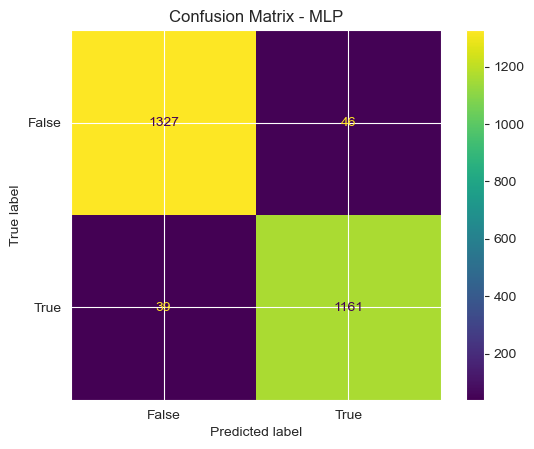

time: 250 ms (started: 2022-12-22 03:52:16 +07:00)


In [94]:
cm_display_mlp.plot()
plt.title('Confusion Matrix - MLP')
plt.savefig('Confusion Matrix - MLP.png')
plt.show()

## FEATURE IMPORTANCE - MLP

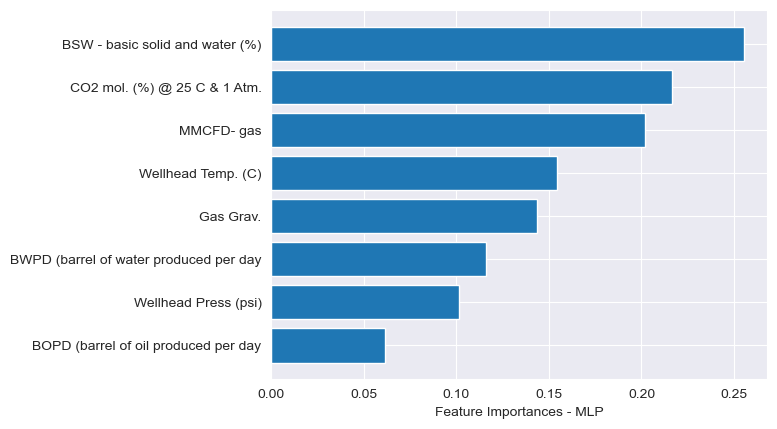

time: 906 ms (started: 2022-12-22 03:52:16 +07:00)


In [95]:
perm_importance = permutation_importance(mlp_opt, Xtest_anova, ytest)

feature_names = ['Wellhead Temp. (C)', 'Wellhead Press (psi)', 'MMCFD- gas', 'BOPD (barrel of oil produced per day', 'BWPD (barrel of water produced per day', 'BSW - basic solid and water (%)', 'CO2 mol. (%) @ 25 C & 1 Atm.', 'Gas Grav.']
features_arr = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features_arr[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Feature Importances - MLP")
plt.savefig('Feature Importances - MLP.png', bbox_inches='tight')

# DATA OUTPUT

In [96]:
df2 = pd.read_csv("generated_dataset.csv")
df2['CR Category'] = df['CR-corrosion defect']

rf_features = cf_opt.predict(pca.transform(scaler.transform(features)))
dt_features = dt_opt.predict(pca.transform(scaler.transform(features)))
svm_features = svm_opt.predict(pca.transform(scaler.transform(features)))
xgb_features = xgb_opt.predict(pca.transform(scaler.transform(features)))
knn_features = knn_opt.predict(pca.transform(scaler.transform(features)))
mlp_features = mlp_opt.predict(pca.transform(scaler.transform(features)))

df2['RF Prediction'] = rf_features
df2['DT Prediction'] = dt_features
df2['SVM Prediction'] = svm_features
df2['XGB Prediction'] = xgb_features
df2['KNN Prediction'] = knn_features
df2['MLP Prediction'] = mlp_features

precision = [precision_rf, precision_dt, precision_svm, precision_xgb, precision_knn, precision_mlp]
recall = [recall_rf, recall_dt, recall_svm, recall_xgb, recall_knn, recall_mlp]
fscore = [fscore_rf, fscore_dt, fscore_svm, fscore_xgb, fscore_knn, fscore_mlp]
accuracy = [accuracy_rf, accuracy_dt, accuracy_svm, accuracy_xgb, accuracy_knn, accuracy_mlp]
rocauc = [rocauc_rf, rocauc_dt, rocauc_svm, rocauc_xgb, rocauc_knn, rocauc_mlp]
classifier = ['RF', 'DT', 'SVM', 'XGB', 'KNN', 'MLP']

df3 = pd.DataFrame(list(zip(classifier, precision, recall, fscore, accuracy, rocauc)), columns = ['Classifier', 'Precision', 'Recall', 'F1-Score', 'Accuracy', 'ROC-AUC'])

time: 2.66 s (started: 2022-12-22 03:52:17 +07:00)


In [97]:
writer = pd.ExcelWriter('CR Prediction.xlsx', engine='xlsxwriter')

df2.to_excel(writer, sheet_name='Classification Approach')
df3.to_excel(writer, sheet_name='Classification Score')

writer.close()

time: 2.16 s (started: 2022-12-22 03:52:20 +07:00)
